### 6.5 Unsupervised Machine Learning

#### 1. Import Libraries and data 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# Ensure charts are displayed in the notebook

%matplotlib inline

In [3]:
# define the path

path = r"C:\Users\sahin\Documents\Country_Vaccinations"

In [5]:
df = pd.read_csv(os.path.join(path, '02-Data', 'Prepared', 'country-vaccinations-cleaned.csv'))

In [6]:
df.shape

(81976, 13)

In [7]:
df.head()

,Unnamed: 0,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
0,0,Afghanistan,2/22/2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,1,Afghanistan,2/23/2021,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,2,Afghanistan,2/24/2021,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,3,Afghanistan,2/25/2021,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,4,Afghanistan,2/26/2021,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."


In [16]:
df.rename(columns = {'people_vaccinated' : 'first_dose', 'people_fully_vaccinated' : 'second_dose', 'total_vaccinations' : 'total_vac', 'daily_vaccinations' : 'daily_vacs', 'total_vaccinations_per_hundred' : 'total_vacs_per_hundred', 'people_vaccinated_per_hundred' : 'first_dose_per_hundred', 'people_fully_vaccinated_per_hundred' : 'second_dose_per_hundred', 'daily_vaccinations_per_million' : 'daily_vacs_per_mil', 'daily_vaccinations_raw' : 'daily_vacs_raw'}, inplace = True)

In [26]:
# drop the non-numerical (categorical) columns

df.drop(columns=['country', 'date', 'vaccines'], inplace=True)

#### 2. The elbow technique

In [27]:
num_cl = range(1,10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl]  # Defines k-means clusters in the range assigned above.

In [28]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]  # Creates a score that represents

# a rate of variation for the given cluster option.

score

[-2.215309791387213e+21,
 -5.666598889304763e+20,
 -3.66988252652099e+20,
 -2.3073418960404834e+20,
 -1.759303024346984e+20,
 -1.3273804826251724e+20,
 -1.0342086890344595e+20,
 -8.262353371625464e+19,
 -6.401948620080473e+19]

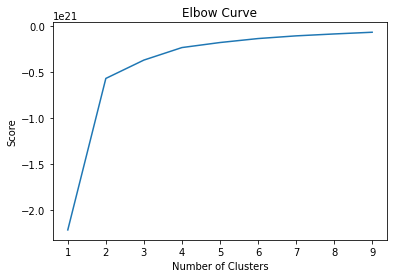

In [29]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In this example, there's a large jump from two to four on the x-axis, but after that, the curve straightens out. This means that the optimal count for my cluster is four (4).

#### 3. k-means clustering

In [31]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4, n_jobs= -1)

In [32]:
# Fit the k-means object to the data.

kmeans.fit(df)

C:\Users\sahin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=4, n_jobs=-1)

In [33]:
df['clusters'] = kmeans.fit_predict(df)

C:\Users\sahin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [34]:
df.head()

,Unnamed: 0,total_vac,first_dose,second_dose,daily_vacs_raw,daily_vacs,total_vacs_per_hundred,first_dose_per_hundred,second_dose_per_hundred,daily_vacs_per_mil,clusters
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,34.0,0
2,2,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,34.0,0
3,3,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,34.0,0
4,4,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,34.0,0


In [35]:
df['clusters'].value_counts()

0    80616
3      933
1      215
2      212
Name: clusters, dtype: int64

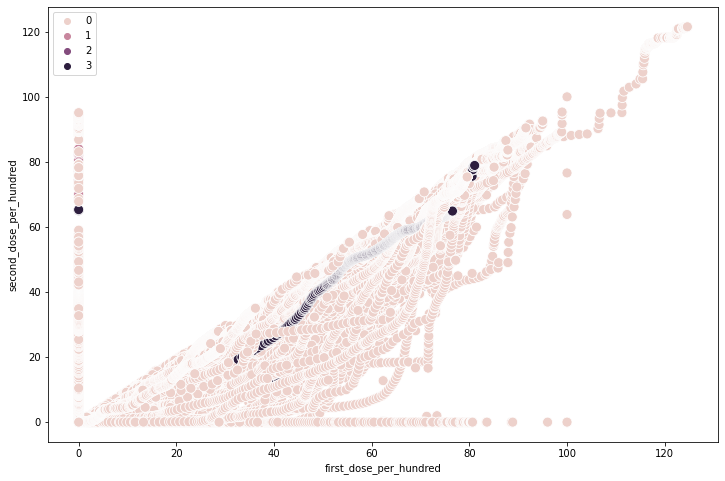

In [37]:
# Plot the clusters for the "first_dose_per_hundred" and "second_dose_per_hundred" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['first_dose_per_hundred'], y=df['second_dose_per_hundred'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('first_dose_per_hundred') # Label x-axis.
plt.ylabel('second_dose_per_hundred') # Label y-axis.
plt.show()

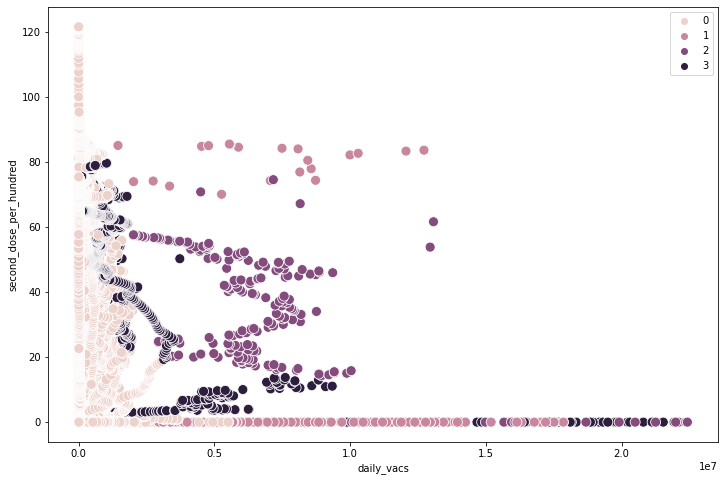

In [38]:
# Plot the clusters for the "daily_vacs" and "second_dose_per_hundred" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['daily_vacs'], y=df['second_dose_per_hundred'], hue=kmeans.labels_, s=100)

ax.grid(False)
plt.xlabel('daily_vacs')
plt.ylabel('second_dose_per_hundred')
plt.show()

In [39]:
df.loc[df['clusters'] == 3, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 2, 'cluster'] = 'purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'pink'
df.loc[df['clusters'] == 0, 'cluster'] = 'cream'

In [40]:
df.groupby('cluster').agg({'second_dose_per_hundred' :['mean', 'median'],
                            'first_dose_per_hundred' :['mean', 'median'],
                            'daily_vacs' :['mean', 'median']})



second_dose_per_hundred         first_dose_per_hundred          \
                               mean  median                   mean  median   
cluster                                                                      
cream                     15.134632   0.000              18.761555   0.000   
dark purple               44.216731  50.380              55.667374  62.980   
pink                       7.835209   0.000               3.259442   0.000   
purple                    30.858774  30.915              48.894387  55.875   

               daily_vacs             
                     mean     median  
cluster                               
cream        6.998996e+04     7115.0  
dark purple  2.373585e+06  1202899.0  
pink         7.071488e+06  6243571.0  
purple       7.557198e+06  6508100.5